In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # 多行输出

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.figure(figsize=(4,4)) # 创建画布,figsize画布大小

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [4]:
import numpy as np
x = np. arange(10)

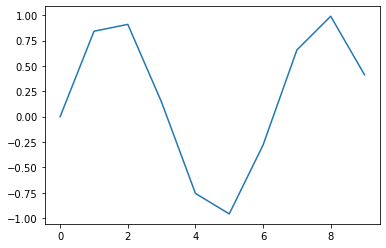

In [5]:
plt.plot(x, np.sin(x))

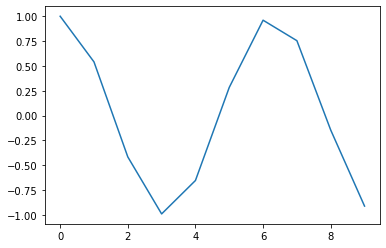

In [6]:
plt.plot(x, np.cos(x))

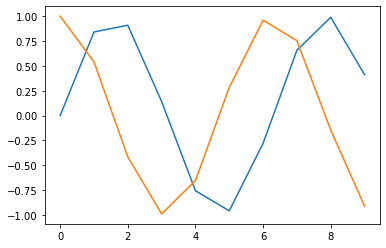

In [7]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Text(0.5, 1.0, 'lines')

f:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


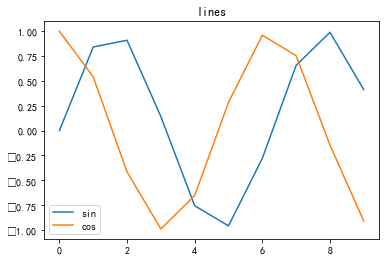

In [42]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.legend(['sin', 'cos']) # 图例

plt.title('lines')
plt.savefig("./tmp/tmp2.png")
plt.show()

In [15]:
# 绘制散点图
data = np.load("../data/国民经济核算季度数据.npz", allow_pickle=True) # 选用指定allow_pickle权限为True，不然报错
data.files # 还可以将numpy的版本降低到1.16.1

['columns', 'values']

In [16]:
data['columns']

array(['序号', '时间', '国内生产总值_当季值(亿元)', '第一产业增加值_当季值(亿元)', '第二产业增加值_当季值(亿元)',
       '第三产业增加值_当季值(亿元)', '农林牧渔业增加值_当季值(亿元)', '工业增加值_当季值(亿元)',
       '建筑业增加值_当季值(亿元)', '批发和零售业增加值_当季值(亿元)', '交通运输、仓储和邮政业增加值_当季值(亿元)',
       '住宿和餐饮业增加值_当季值(亿元)', '金融业增加值_当季值(亿元)', '房地产业增加值_当季值(亿元)',
       '其他行业增加值_当季值(亿元)'], dtype=object)

In [17]:
data['values']

array([[1, '2000年第一季度', 21329.9, ..., 1235.9, 933.7, 3586.1],
       [2, '2000年第二季度', 24043.4, ..., 1124.0, 904.7, 3464.9],
       [3, '2000年第三季度', 25712.5, ..., 1170.4, 1070.9, 3518.2],
       ...,
       [67, '2016年第三季度', 190529.5, ..., 15472.5, 12164.1, 37964.1],
       [68, '2016年第四季度', 211281.3, ..., 15548.7, 13214.9, 39848.4],
       [69, '2017年第一季度', 180682.7, ..., 17213.5, 12393.4, 42443.1]],
      dtype=object)

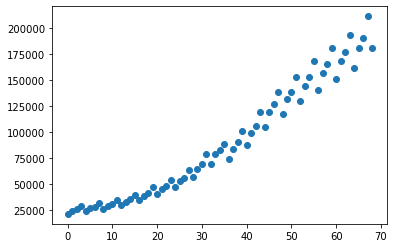

In [19]:
plt.scatter(range(69), data['values'][:, 2]) # 绘制第3列，国内生产总值_当季值(亿元)
plt.show()

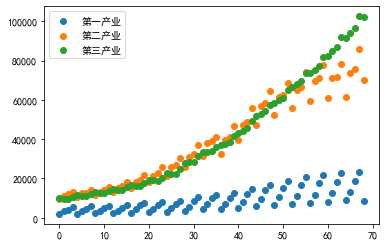

In [23]:
# 中文乱码的处理，rcParams可以用于设置图的分辨率和大小等信息
plt.rcParams['font.sans-serif'] = ['SimHei']

for i in [3, 4, 5]:
    plt.scatter(range(69), data['values'][:, i]) # 分别绘制4,5,6列
plt.legend(['第一产业', '第二产业', '第三产业'])
plt.show()

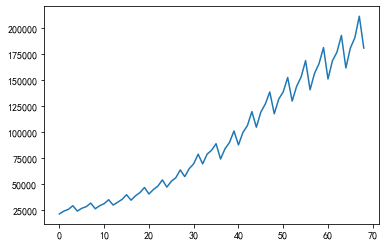

In [24]:
plt.plot(range(69), data['values'][:, 2])
plt.show()

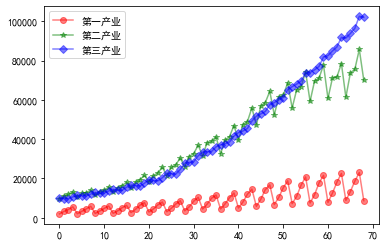

In [28]:
# 绘制折线图
line_color = ['r', 'g', 'b']
markers = ['o', '*', 'D']

for index, value in enumerate([3, 4, 5]): 
    plt.plot(range(69), data['values'][:, value], c=line_color[index], marker=markers[index], alpha=0.5) # 分别绘制4,5,6列
plt.legend(['第一产业', '第二产业', '第三产业'])
plt.show()

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x189de283ef0>,
 [Text(0, 0, '第一产业'), Text(0, 0, '第二产业'), Text(0, 0, '第三产业')])

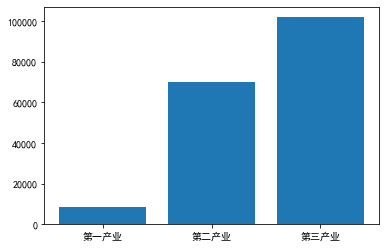

In [31]:
# 绘制直方图
num = data['values'][68, 3:6] # 只绘制最后一行的数据
plt.bar(range(len(num)), num)
plt.xticks(range(len(num)), ['第一产业', '第二产业', '第三产业'])
plt.show()

<Figure size 288x288 with 0 Axes>

([<matplotlib.patches.Wedge at 0x189e0ec4f28>,
 [Text(1.6807912230362252, 0.25483497515919934, '第一产业'),
  Text(0.07369515987160327, 1.3980590200029106, '第二产业'),
  Text(-0.28243572457414956, -1.3712148123048682, '第三产业')],
 [Text(0.8898306474897663, 0.1349126339078114, '4.79 %'),
  Text(0.03158363994497283, 0.5991681514298188, '38.74 %'),
  Text(-0.1210438819603498, -0.5876634909878007, '56.47 %')])

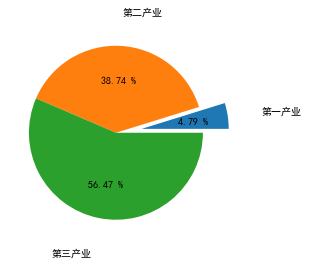

In [36]:
# 饼图的绘制
plt.figure(figsize=(4,4))
plt.pie(num, autopct="%.2f %%", explode=[0.3, 0, 0], labels=['第一产业', '第二产业', '第三产业'], labeldistance=1.4)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x189de938cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x189de2f5c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x189de938e48>,
 'medians': [<matplotlib.lines.Line2D at 0x189e0c64ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x189dde09588>,
 'means': []}

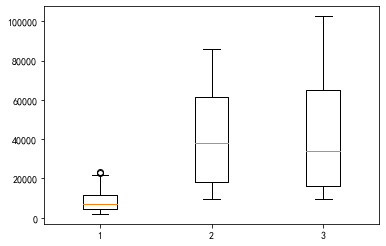

In [39]:
# 绘制箱线图
num2 = (list(data['values'][:, 3]), list(data['values'][:, 4]), list(data['values'][:, 5]))
plt.boxplot(num2)
plt.show()

In [43]:
import pandas as pd

f:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [44]:
df = pd.DataFrame(np.arange(12).reshape(3,4), columns=['A', 'B', 'C', 'D'])
df[0:4]

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
data = np.load("../data/国民经济核算季度数据.npz", allow_pickle=True)
data.files

['columns', 'values']

In [8]:
data['columns']

array(['序号', '时间', '国内生产总值_当季值(亿元)', '第一产业增加值_当季值(亿元)', '第二产业增加值_当季值(亿元)',
       '第三产业增加值_当季值(亿元)', '农林牧渔业增加值_当季值(亿元)', '工业增加值_当季值(亿元)',
       '建筑业增加值_当季值(亿元)', '批发和零售业增加值_当季值(亿元)', '交通运输、仓储和邮政业增加值_当季值(亿元)',
       '住宿和餐饮业增加值_当季值(亿元)', '金融业增加值_当季值(亿元)', '房地产业增加值_当季值(亿元)',
       '其他行业增加值_当季值(亿元)'], dtype=object)

In [9]:
data['values']

array([[1, '2000年第一季度', 21329.9, ..., 1235.9, 933.7, 3586.1],
       [2, '2000年第二季度', 24043.4, ..., 1124.0, 904.7, 3464.9],
       [3, '2000年第三季度', 25712.5, ..., 1170.4, 1070.9, 3518.2],
       ...,
       [67, '2016年第三季度', 190529.5, ..., 15472.5, 12164.1, 37964.1],
       [68, '2016年第四季度', 211281.3, ..., 15548.7, 13214.9, 39848.4],
       [69, '2017年第一季度', 180682.7, ..., 17213.5, 12393.4, 42443.1]],
      dtype=object)

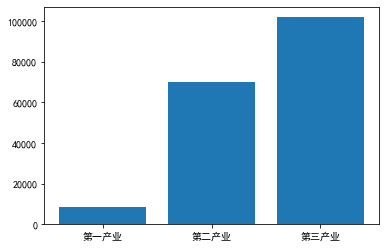

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文正确显示

# 绘制2000年第一季度各产业国民生产总值分布直方图
x = data['values'][68, 3:6] # 只需要2000年第一季度这一行的3、4、5三列数据
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), ['第一产业', '第二产业', '第三产业'])
plt.show()

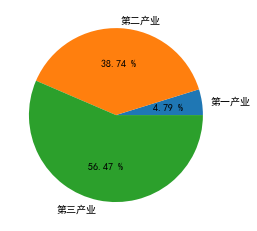

In [11]:
# 绘制2000年第一季度各产业国民生产总值分布饼图
plt.pie(x, autopct="%.2f %%", labels=['第一产业', '第二产业', '第三产业'])
plt.show()

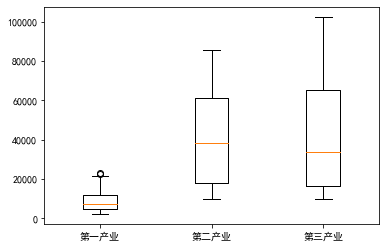

In [12]:
# 绘制2000-2017年各长夜国民生产总值箱线图
y = (list(data['values'][:, 3]), list(data['values'][:, 4]), list(data['values'][:, 5]))
plt.boxplot(y, labels=['第一产业', '第二产业', '第三产业'])
plt.show()